# DBSCAN(Density Based Spatial Clustering of Application with Noise)

* 간단하고 직관적인 알고리즘에도 불구하고 데이터의 분포가 기하학적으로 복합잔 데이터 세트에도 효과적인 군집화가 가능.
* 특정 공간 내에 데이터 밀도 차이를 기반으로 한 알고리즘.


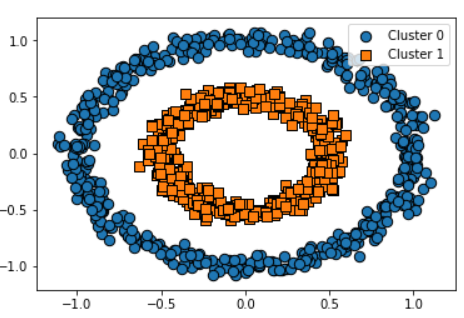

위 그림과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화할 때, K-평균, 평균 이동, GMM으로는 효과적인 군집화하기 어렵지만, DBSCAN은 특정 공간 내 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.

### DBSCAN의 가장 중요한 두 가지 파라미터 : 입실론(epsilon), min points
* 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역이다.
* 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수이다.

### 데이터 포인트 정의
* 핵심 포인트(Core Point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 한다.
* 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 한다.
* 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 한다.
* 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 한다.

### 과정

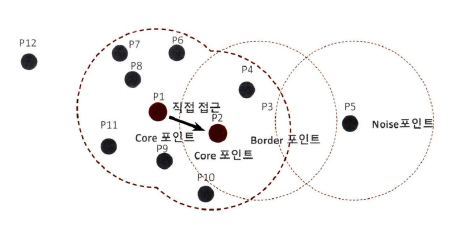

최소 데이터 세트를 5개로 가정.
1. P1을 기준으로 이웃 포인트가 6개(P2, P6, P7, P8, P9, P11)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point)이다.

2. P2를 기준으로 이웃 포인트가 5개(P1, P3, P4, P9, P10)로 핵심 포인트이다.

3. P1의 이웃 데이터 포인트 P2가 핵심 포인트이므로 P1에서 P2로 직접 접근 가능.

4. P1에서 직접 접근이 가능한 P2를 서로 연결하여 군집화 구성. 이런식으로 반복하면서 군집 영역 확장.

5. P3의 경우 이웃 포인트 2개로 핵심 포인트가 될 수 없다. 하지만 이웃 데이터 중 핵심 포인트인 P2를 가지고 있어, 경계 포인트(Border Point)라고 한다. 경계 포인트는 군집의 외곽를 형성한다.

6. P5와 같이 반경내 최소 데이터를 가지고 있지 않고, 핵습 포인트 또한 이웃 포인트로 가지고 있는 데이터를 잡음 포인트(Noise Point)라고 한다.

### 사이킷런의 DBSCAN 클래스 - 파라미터
* eps : 입실론 주변 영역의 반경을 의미.
* min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터 최소 개수를 의미(자신의 데이터 포함)

In [1]:
# DBSCAN - 붓꽃 데이터
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [2]:
from sklearn.cluster import DBSCAN
# eps=0.6, min_samples=8로 군집화.
# 일반적으로 eps는 1 이하의 값을 설정한다.
# eps가 증가하면 noise 줄어듦
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

0과 1 외에 -1이라는 군집 레이블이 있다. 
* -1 군집은 노이즈에 속하는 군집을 의미.
* 0과 1 두 개의 군집으로 군집화되었다.

**DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미 => 파라미터를 통해 최적의 군집을 찾는 것이 중요.**

DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해서 PCA를 이용해 2개의 피처로 압축 변환한 뒤, visualize_cluster_plot() 함수를 이용해 시각화.

In [3]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

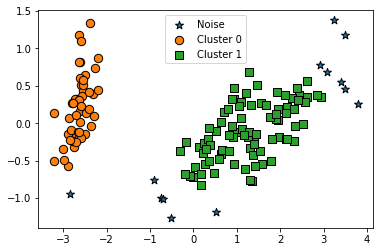

In [4]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d() 함수 인자로 사용하기 위해 irisDF의 'ftr1', 'ftr2' 칼럼에 
# PCA로 변환된 피처 데이터 세트를 입력
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

* 별표로 표시된 값은 모두 노이즈이다. PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러난다. 
*DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다. 
* DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 것이 중요.
* eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아져 노이즈 데이터 개수가 작아진다.
* min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다. => 데이터 밀고다 더 커져야 하는데, 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


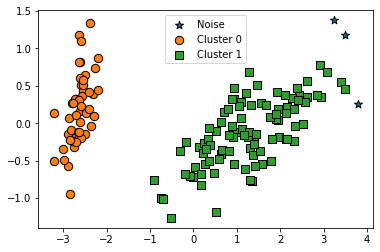

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

eps를 기존 0.6에서 0.8로 증가시키면서 노이즈 데이터 수가 3개밖에 없다. 

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


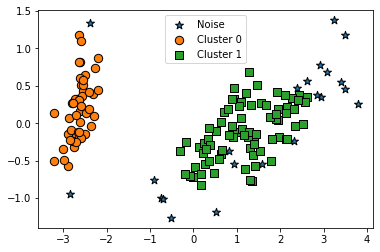

In [6]:
# DBSCAN을 eps를 기존 0.6으로 유지하고 min_samples를 16으로 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

노이즈 데이터가 기존보다 많이 증가함을 알 수 있다.

# DBSCAN 적용하기 - make_circles() 데이터 세트

### 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘 비교.

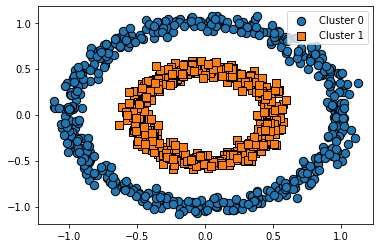

In [7]:
# make_circles()로 내부 원과 외부 원 형태로 돼있는 2차원 데이터 세트를 만든다.
# make_circles() 함수는 오직 2개의 피처만을 생성 -> 별도의 피처 개수를 지정할 필요 X
# 파라미터 noise는 노이즈 데이터 세트의 비율, factor는 외부 원과 내부 원의 scale 비율
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

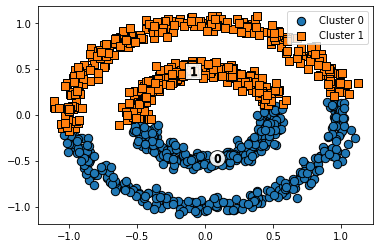

In [8]:
# K-평균으로 군집화.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화. 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.

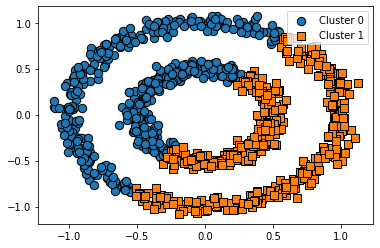

In [9]:
# GMM으로 군집화
from sklearn.mixture import GaussianMixture
 
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

GMM은 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했지만, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았다.

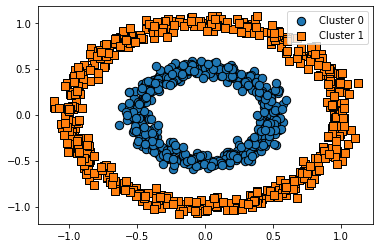

In [10]:
# DBSCAN으로 군집화
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화되었다.

